# Защита персональных данных клиентов

**Описание проектной работы**

В данной работе нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Также предстоит обосновать корректность его работы.

**Цель проекта**

Нужно защитить данные таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Ход работы**

   1. Загрузка и изучение данных.
   2. Ответ на вопрос и обоснование решения.  
     
     Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново):    
           
     a. Изменится. Привести примеры матриц.                
     b. Не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
        
   3. Предложение алгоритма преобразования данных для решения задачи. Обоснование, почему качество линейной регрессии не поменяется.
   
   4. Разработка алгоритма, применив матричные операции. Проверка, что качество линейной регрессии из `sklearn` не отличается до и после преобразования. Использование метрики `R2`.
   
**Описание данных**

   - `Признаки`: пол, возраст и зарплата застрахованного, количество членов его семьи.
   - `Целевой признак`: количество страховых выплат клиенту за последние 5 лет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Загрузка и изучение данных

[Назад к содержанию](#Содержание)

Импортируем необходимые бибилотеки

In [1]:
# импорт библиотек:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('/datasets/insurance.csv')
print('Ok, датафрейм сформирован!')

Ok, датафрейм сформирован!


In [3]:
# проанализируем датафрейм с помощью метода describe():

data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Можно отметить разный масштаб принимаемых значений у признаков.

In [4]:
# вывод общей информации о датафрейме:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Перед нами датафрейм с `5000` объектами и `5` признаками. Форматы записи признаков не требуют дополнительного преобразования и подходят для дальнейшей работы. Пропуски отсутствуют, убедимся в этом, с помощью следующего кода.

In [5]:
# проверка на наличие пропусков:

data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Подтвердили отсутствие пропусков. Проверим на явные дубликаты.

In [6]:
# проверка на дубликаты:

data.duplicated().sum()

153

Выявили явные дубликаты. Выведем несколько строк-дубликатов.

In [7]:
# вывод строк-дубликатов:

duplicated_rows = data[data.duplicated()]
duplicated_rows.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


Скорее всего в датафрейм попали действительно явные дубликаты. Т.к. вряд ли найдутся персональные данные разных людей с одинаковым возрастом, зарплатой и т.п. Поэтому удалим повторяющиеся объекты.

In [8]:
# удаление дубликатов:

data.drop_duplicates(inplace=True)

In [9]:
# сброс индексов:

data = data.reset_index()

In [10]:
# проверка на дубликаты:

data.duplicated().sum()

0

In [11]:
# вывод общей информации:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4847 non-null   int64  
 1   Пол                4847 non-null   int64  
 2   Возраст            4847 non-null   float64
 3   Зарплата           4847 non-null   float64
 4   Члены семьи        4847 non-null   int64  
 5   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 227.3 KB


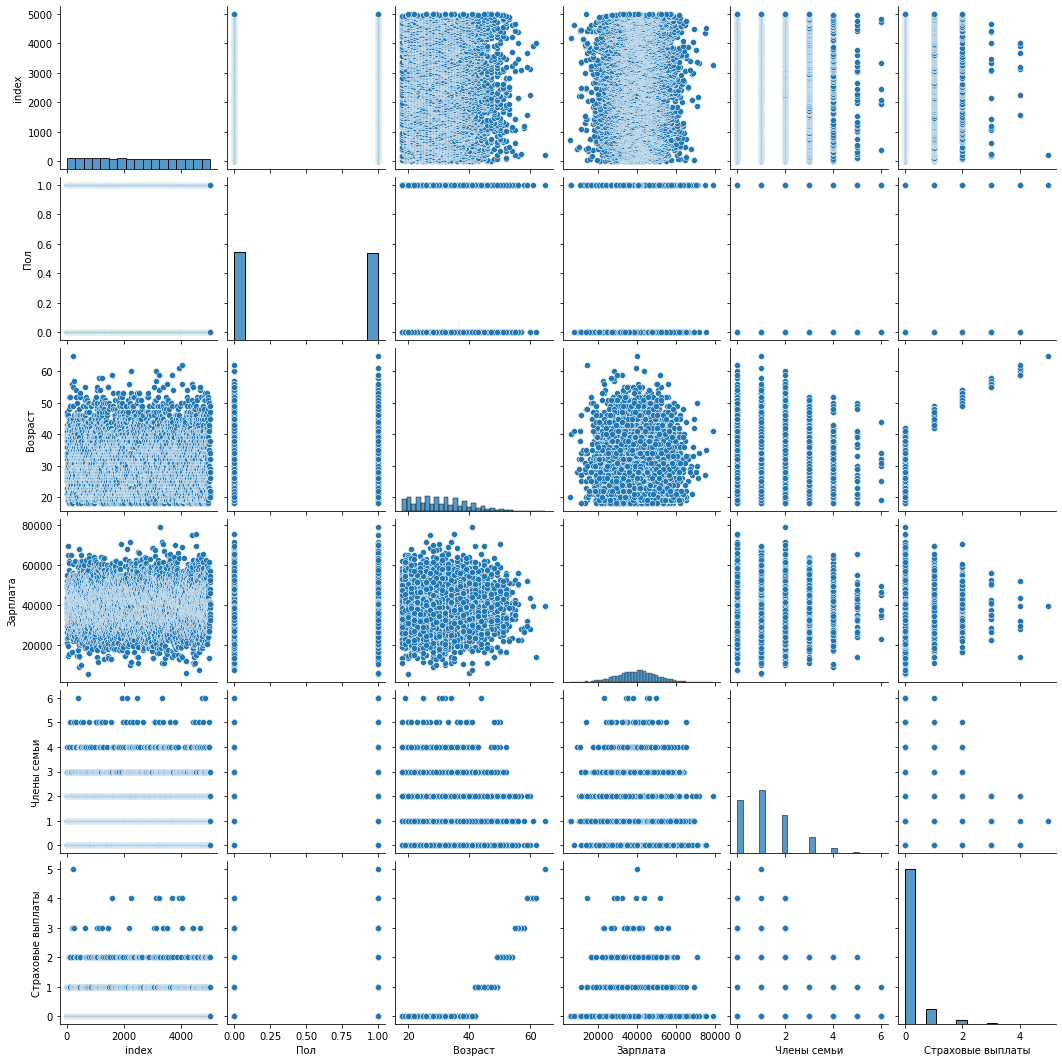

In [12]:
# построение диаграмм рассеяния по всем данным для датафрейма:

sns.pairplot(data);

Загрузили и изучили данные. Аномальных значений не обнаружено. В датасете присутствовало `153` дубликата - избавились от них. Сейчас датафрейм состоит из `4847` объекта и `5` признаков. Значения признаков принимают различный масштаб.

Переходим к следующему шагу.

## Умножение матриц

[Назад к содержанию](#Содержание)

Проверим изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу.

Введем следующие обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $X1$ - преобразованная матрица - матрица признаков, умноженная на обратимую матрицу $P$: $X1 = X*P$ 

- $y$ — вектор целевого признака

- $P$ — обратимая матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
- $w1$ - вектор весов преобразованной линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Выведем формулу предсказания для преобразованной матрицы, обозначим ее $a1$:

$$
a1 = X1*w1,
$$

где: 

- $w1$ - вектор весов преобразованной матрицы;
- $X1 = X*P$ - преобразованная матрица

В соответствии с данными формулами произведем преобразование значения предсказания $a$:

$$
a = X*(X^T X)^{-1} X^T y
$$

Теперь рассмотрим преобразованную матрицу $X1$ - она равна произведению матрицы признаков ($X$) с нулевым столбцом, состоящим из единиц, и без учета целевого признака на произвольную обратимую матрицу ($P$).

Матрица $X$ размером 5 (столбцов) х 4847 (строк)

Согласно правилам умножения матриц, умножение матрицы на матрицу возможно, если ширина первой матрицы $X$ (𝑚×𝑛) равна высоте второй матрицы $P$ (𝑛×r). Т.е. обратимая матрица $P$ должна состоять из 5 строк. Обратимая матрица по своему определению должна быть квадратной, т.е. обратимая матрица $P$ должна быть размером 5 (столбцов) х 5 (строк).

Далее распишем вектор весов преобразованной матрицы $w1$.

$$
w1 = (X1^T X1)^{-1} X1^T y = ((XP)^TXP)^{-1}(XP)^Ty
$$

Раскроем скобки по правилу: $(AB)^T = B^TA^T$

$$
w1 = (P^TX^TXP)^{-1}*P^TX^Ty = (P^T(X^TX)P)^{-1}*P^TX^Ty = P^{-1}(X^TX)^{-1}*(P^T)^{-1}*P^TX^Ty
$$





Рассмотрим произведение $(P^T)^{-1}*P^T$

Матрица $P^T$ является квадратной. Поэтому данное произведение $(P^T)^{-1}*P^T$ будет равно единичной матрице $E$ согласно формуле: 

$$AA^{-1} = A^{-1}A = E
$$

Примем во внимание следующее утверждение: если любую матрицу A умножить на единичную (или наоборот), получится эта же матрица A: 

$$
AE = EA = A
$$ 

В соответствии с этим вектор $w1$ будет равен:

$$
w1 = P^{-1}(X^TX)^{-1}*E*X^Ty = P^{-1}(X^TX)^{-1}*X^Ty
$$

Подставим полученное выражение в формулу предсказания для преобразованной матрицы 𝑎1:

$$
a1 = X1*w1 = XP*P^{-1}(X^TX)^{-1}*X^Ty = X*E*(X^TX)^{-1}*X^Ty = X(X^TX)^{-1}*X^Ty = a
$$

Таким образом доказали, что $a = a1$. Это означает, что при умножении признаков на обратимую матрицу предсказания останутся прежними.

  - **Вывод**

Доказали, что качество линейной регрессии при умножении признаков на обратимую матрицу не ухудшится.

Теперь ответим на вопрос: "Как связаны параметры линейной регрессии в исходной задаче и в преобразованной"?

Ранее при доказательстве утверждения о том, что при умножении признаков на обратимую матрицу качество модели не ухудшится, была выведена следующая формула:

$$
w_p = P^{-1}(X^TX)^{-1}*X^Ty
$$

Выражение $(X^TX)^{-1}*X^Ty$ равно $w$, т.е.:

$$
w_p = P^{-1}w
$$

  - **Вывод**

Т.е. параметры линейной регрессии в исходной задаче и в преобразованной связаны линейно и определяются полученной формулой.

## Алгоритм преобразования

[Назад к содержанию](#Содержание)

Предложим алгоритм преобразования данных для решения задачи. 

Приведём обоснование вопроса, почему качество линейной регрессии не поменяется.

По скольку ранее подтвердили, что качество линейной регрессии не ухудшится при умножении исходных признаков на обратимую матрицу, то для защиты персональных данных можно этим воспользоваться. Т.е. можно умножить признаки на произвольную обратимую матрицу, не ухудшив при этом качество линейной регрессии. При этом значения признаков будут изменены и без наличия обратимой матрицы восстановить признаки будет не возможно.

**Алгоритм**

Алгоритм преобразования будет следующим.

1. Сгенерируем случайную обратимую матрицу $P$. Генерировать будем до тех пор, пока не получим обратимую матрицу. Размер матрицы $P$ будет равен количеству признаков в матрице $X$. Для этого сделаем собственную функцию.
2. Создадим матрицу $X$ - она будет состоять из нулевого столбца, состоящего из единиц, и признаков из датафрейма data. Матрица $X$ не будет включать целевые признаки. В качестве целевого признака будем использовать столбец "Страховые выплаты".
3. Сделаем матрицу $X1$ - она будет равна векторному произведению матриц $X$ на $P$.
4. Проверим качество линейной регрессии для матриц $X$ и $X1$. В качестве метрики качества будем использовать метрику R2.
5. Приведем значения признаков в матрицах $X$ и $X1$ к одинаковому масштабу и проверим значение R2.

## Проверка алгоритма

[Назад к содержанию](#Содержание)

In [13]:
# определение признаков:

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [15]:
# проверка признаков:

features.head()

,index,Пол,Возраст,Зарплата,Члены семьи
0,0,1,41.0,49600.0,1
1,1,0,46.0,38000.0,1
2,2,0,29.0,21000.0,0
3,3,0,21.0,41700.0,2
4,4,1,28.0,26100.0,0


In [16]:
# удаление столбца index:

features.drop('index', axis=1, inplace=True)
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [17]:
# проверка целевого признака:

target.head()

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

In [18]:
# создание матрицы X:

X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
X

array([[1.00e+00, 1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [19]:
# создание вектора y:

y = target
y

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: Страховые выплаты, Length: 4847, dtype: int64

Создадим функцию `get_rand_matrix`, которая будет генерировать случайную обратимую матрицу размером равным количеству признаков в матрице признаков $X$. Функция будет генерировать матрицы пока не получит обратимую матрицу.

In [20]:
def get_rand_matrix(X):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(X.shape[1], X.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

In [21]:
# генерация случайной обратимой матрицы:

P = get_rand_matrix(X)
P

array([[-0.7192336 ,  0.44963855,  1.00676561,  1.06855526,  1.1570399 ],
       [ 2.48691229, -1.23717688, -0.18321763,  0.28767045, -0.29594119],
       [-2.59569606, -0.09754128, -0.20439605,  1.19166139,  1.14527196],
       [ 0.22228698, -0.40545355,  0.27058641, -0.08912404,  0.63016216],
       [ 0.65777203, -0.74051811,  1.04971511,  0.88142087, -0.74021018]])

Создали обратимую случайную матрицу. Проверили на обратимость. Далее умножим матрицу признаков $X$ на полученную обратимую матрицу $P$ и получим преобразованную матрицу с признаками.

In [22]:
# создание матрицы X1:

X1 = X @ P

In [23]:
X1

array([[ 10921.43595944, -20116.02329539,  13414.57892504,
         -4369.45676311,  31303.12020612],
       [  8327.4416364 , -15412.01265275,  10274.93781483,
         -3329.9472293 ,  23999.26144379],
       [  4592.03209252,  -8516.90359437,   5677.39387491,
         -1835.97816488,  13267.77529995],
       ...,
       [  7484.21090138, -13747.85754536,   9171.89754923,
         -2994.64042869,  21385.07930409],
       [  7215.41982146, -13263.48606373,   8847.65156348,
         -2884.13916315,  20630.13910389],
       [  8954.59721742, -16465.67331484,  10981.95839022,
         -3582.83197527,  25616.77222498]])

Получили преобразованную матрицу с признаками. Получившиеся значения явно будет трудно расшифровать.

Далее создадим функцию `model` для обучения и тестирования моделей.

In [24]:
# функция для обучения и проверки моделей:

def model(X, y):

    # создание выборок:
    features_train, features_test, target_train, target_test = \
      train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # создание модели с помощью линейной регрессии:
    model = LinearRegression()

    # обучение модели на тренировочной выборке:
    model.fit(features_train, target_train)

    # предсказания на тестовой выборке:
    predictions = model.predict(features_test)

    # расчет R2 на тестовой выборке: 
    r2 = r2_score(target_test, predictions)
   
    return r2

In [25]:
# сохраним полученные значения R2

# R2 для изначального датафрейма:
r2_initial = model(X, y)

# R2 для преобразованных данных:
r2_convert = model(X1, y)

In [26]:
print('R2 для исходных данных:', r2_initial)
print('R2 для преобразованных данных:', r2_convert)

R2 для исходных данных: 0.44346330831611946
R2 для преобразованных данных: 0.44346689267992645


Значения практически одинаковые. Поэтому практически убедились в том, что умножение исходных признаков на обратимую матрицу не влияет на качество линейной регрессии.

При изучении исходного датафрейма был выявлен разный масштаб у признаков. Приведем значения признаков к одинаковому масштабу, обучим заново модель и выведем значения `R2`. Для этого скорректируем функцию `model` следующим образом:

In [27]:
# функция для масштабирования признаков, обучения и проверки моделей:

def model_scaled(X, y):

    # создание выборок:
    features_train, features_test, target_train, target_test = \
      train_test_split(X, y, test_size = 0.25, random_state = 42)

    # создание объекта структуры StandardScaler():
    scaler = StandardScaler()

    # настройка обучающих данных:
    scaler.fit(features_train)

    # преобразование обучающей и валидационной выборок функцией transform():
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    # создание модели с помощью линейной регрессии:
    model_scaled = LinearRegression()

    # обучение модели на тренировочной выборке:
    model_scaled.fit(features_train, target_train)

    # предсказания на тестовой выборке:
    predictions = model.predict(features_test)

    # расчет R2 на тестовой выборке: 
    r2_scaled = r2_score(target_test, predictions)
   
    return r2_scaled

In [28]:
# сохраним полученные значения R2 для масштабированных признаков:

# R2 для изначального датафрейма:
r2_initial_scaled = model(X, y)

# R2 для преобразованных данных:
r2_convert_scaled = model(X1, y)

In [29]:
print('R2 для исходных данных после масштабирования признаков:', r2_initial_scaled)
print('R2 для преобразованных данных после масштабирования признаков:', r2_convert_scaled)

R2 для исходных данных после масштабирования признаков: 0.44346330831611946
R2 для преобразованных данных после масштабирования признаков: 0.44346689267992645


Выведем все получившиеся метрики в виде датафрейма.

In [30]:
# вывод итоговых результатов:

results = pd.DataFrame({
        'Решения': [
        'Исходные данные', 
        'Преобразованные данные', 
        'Исходные данные после масштабирования',
        'Преобразованные данные после масштабирования'
    ],

        'R2': [
        r2_initial,
        r2_convert,
        r2_initial_scaled,
        r2_convert_scaled
    ]
})

results

,Решения,R2
0,Исходные данные,0.443463
1,Преобразованные данные,0.443467
2,Исходные данные после масштабирования,0.443463
3,Преобразованные данные после масштабирования,0.443467


Можно отметить, что после масштабирования признаков качество модели осталось прежним.

## Выводы

[Назад к содержанию](#Содержание)

В данном проекте разработали метод защиты персональных данных. Данный метод основан на преобразовании признаков в исходных данных: признаки умножили на произвольную обратимую матрицу и получили данные, которые трудно будет восстановить без знания использованной матрицы. Качество модели при этом не ухудшилось. Для этого было проведено доказательство. Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой линейно. 

В итоге получили зашифрованные персональные данные. Были обучены модели и сравнили качество полученных моделей. В качестве метрики качества использовали коэффициент детерминации `R2`. На практике убедились в правильности алгоритма шифровки данных. Метрики `R2` получились одинаковые до шифровки и после.

Также привели значения признаков к единому масштабу и проверили метрики `R2`. `R2` до и после изменения масштаба остались без изменений. 

Сводная таблица полученных метрик:

In [31]:
results

,Решения,R2
0,Исходные данные,0.443463
1,Преобразованные данные,0.443467
2,Исходные данные после масштабирования,0.443463
3,Преобразованные данные после масштабирования,0.443467
